# 통계적 방법에 따른 변수 선택 및 분류

- 결측치 제거 및 통계적 방법으로 선정된 컬럼을 가진 데이터를 활용
- random forest, logistic , svm classifier를 통해 분류

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use("ggplot")


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# 통계적 방법에 따른 변수 로드

In [19]:
#기초 전처리 데이터 출력
x_train = pd.read_excel("../data/cip_clean.xlsx")
x_test = pd.read_excel("../data/cip_clean_test.xlsx")

y_train = pd.read_excel("../data/cip_clean_y.xlsx")
y_test = pd.read_excel("../data/cip_clean_test_y.xlsx")

In [20]:
x_train.drop(['factor1','factor2','factor3'],axis=1,inplace=True)
x_test.drop(['factor1','factor2','factor3'],axis=1,inplace=True)

In [21]:
x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] =x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [22]:
x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] =x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        374 non-null    int64   
 1   iBT         374 non-null    float64 
 2   pCO2        374 non-null    float64 
 3   SaO2        374 non-null    float64 
 4   Hb          374 non-null    float64 
 5   Plt         374 non-null    int64   
 6   sex         374 non-null    category
 7   bed         374 non-null    category
 8   Foley       374 non-null    category
 9   Nursing     374 non-null    category
 10  Hsp-acq     374 non-null    category
 11  3m-Ab       374 non-null    category
 12  3m-Adm      374 non-null    category
 13  NR          374 non-null    category
 14  1y-UTI      374 non-null    category
 15  PPIantacid  374 non-null    category
 16  CV          374 non-null    category
dtypes: category(11), float64(4), int64(2)
memory usage: 23.0 KB


In [24]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        94 non-null     int64   
 1   iBT         94 non-null     float64 
 2   pCO2        94 non-null     float64 
 3   SaO2        94 non-null     float64 
 4   Hb          94 non-null     float64 
 5   Plt         94 non-null     int64   
 6   sex         94 non-null     category
 7   bed         94 non-null     category
 8   Foley       94 non-null     category
 9   Nursing     94 non-null     category
 10  Hsp-acq     94 non-null     category
 11  3m-Ab       94 non-null     category
 12  3m-Adm      94 non-null     category
 13  NR          94 non-null     category
 14  1y-UTI      94 non-null     category
 15  PPIantacid  94 non-null     category
 16  CV          94 non-null     category
dtypes: category(11), float64(4), int64(2)
memory usage: 6.9 KB


# 분류

## Logistic regression

## SVM

## random forest

In [25]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1234)
# out-of-bag score은 예측이 얼마나 정확한가에 대한 추정을 수치로 나타낸 것입니다.
rf.fit(x_train, y_train['CIP'])

RandomForestClassifier(oob_score=True, random_state=1234)

In [26]:

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.674
Mean accuracy score: 0.66


<AxesSubplot:>

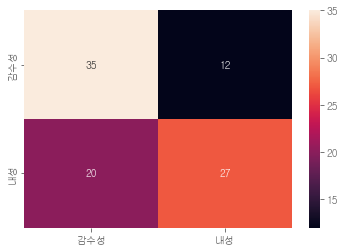

In [27]:

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['감수성','내성'], index=['감수성','내성'])
sns.heatmap(cm, annot=True)

결과적으로, 

모든 변수를 포함한 BASELINE이 0.67 었는데, 통계적 방법에 따른 선택시 0.66이 되었다.

17개의 변수를 사용했음에도, SHAP를 이용해 선정한 방법보다 더 좋은 성능을 보였다.

통계적 방법으로 선정시, 더 적절하다고 할 수 있다.

하지만, 변수를 축약하는 과정은 Accuracy를 떨어뜨리는 작업임을 알 수 있다.

또한, Factor analysis를 통해 구한 변수는 accuracy를 떨어뜨렸다.